# Channel-flow turbulence model

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import math
import xcompact3d_toolbox as x3d

### Calculations

#### Reynolds number for Channel (Pipe) Flow

Reynolds number

$$R_e=\frac{\rho v D}{\mu}$$

where,

Laminar Flow: $R_e \le 2300$ 

Transition Flow: $2300 \le R_e \le 4000$

Turbulent Flow: $R_e \ge 4000$

Source: FLUID MECHANICS: FUNDAMENTALS AND APPLICATIONS Cengal

In [118]:
# Calculate Reynolds number from wind speed
# Velocity [m/s]
v = 2.23

# Channel dimensions [m]
h = 2 # channel height
lx = 12 # streamwise length
lz = 4 # spanwise length

# Kinenatic Viscosity [m^2/s]
kine_visc = 1.568E-5

# Reynolds number
Reb = (h*v)/kine_visc
print(f'Reb = {Reb:.07}')

Reb = 284438.8


### Parameters

In [122]:
x3d.param["mytype"] = np.float64

In [123]:
prm = x3d.Parameters(
    filename="../simulations/15_intensity/input.i3d",
    ## BasicParam ##

    # Flow type
    itype=3,    # Enables Sandbox parameters
    ilesmod=1,  # Enables Large-Eddy methodologies (0: DNS, 1: LES)
    iibm=0,     # Flag for immersed boundary method

    # Domain decomposition
    p_row=0,
    p_col=0,

    # Mesh
    nx=128,
    ny=65,
    nz=64,
    istret = 2,            # y mesh refinement (0:no, 1:center, 2:both sides, 3:bottom)
    beta = 0.25, #0.259065151, (old number)   # Refinement parameter (beta)

    # Domain dimensions
    xlx=lx,
    yly=h,
    zlz=lz,

    # Boundary conditions 
    # 0 - Periodic boundary conditions (This means the flow will be fully developed)
    # 1 - Free-slip boundary conditions
    # 2 - Dirichlet boundary conditions (no-slip), def: type of boundary condition, where numerical value is given directly to boundary faces
    nclx1=0,    # Velocity boundary condition where x=0
    nclxn=0,    # Velocity boundary condition where x=xlx
    ncly1=2,    # Velocity boundary condition where y=0
    nclyn=2,    # Velocity boundary condition where y=yly
    nclz1=0,    # Velocity boundary condition where z=0
    nclzn=0,    # Velocity boundary condition where z=zlz
    
    # Initial Conditions
    iin=1,                  # Inflow conditions (1: classic, 2: turbinit, 4: SEM)
    re=Reb,                  # Reynolds number, defined using the reference length scale and reference velocity, hence Re=1/nu.
    #cpg = F,                 # if cpg=T, then re is friction Reynolds number
    init_noise=0.15,       # Turbulence intensity (1=100%) !! Initial condition
    inflow_noise=0.15,       # Turbulence intensity (1=100%) !! Inflow condition
    #idir_stream  = 1,        # Index of the streamwise direction (1=X, 3=Z, 2 not available)

    # Time stepping
    dt=0.0025,       # Time step
    ifirst=1,       # First iteration
    ilast=100000,   # Last iteration
    
    # Dissipation control
    nu0nu=4.0,  # Ratio between hyperviscosity/viscosity at nu (dissipation factor intensity)
    cnu=0.44,   # Ratio between hyperviscosity at km=2/3π and kc=π (dissipation factor range)
    
    # InOutParam
    irestart=0,         # Read initial flow field (0: No, 1: Yes)
    icheckpoint=1000,   # Frequency for writing backup file
    ioutput=1000,       # Frequency for visualization file
    #iprocessing=100,   # Frequency for online postprocessing
    
    # LESModel
    jles=2,               # LES Model (1: Phys Smag, 2: Phys WALE, 3: Phys dyn. Smag, 4: iSVV, 5: dyn SEV)
    smagcst = 0.14,        # Smagorinsky constant
    walecst = 0.325,       # WALES Model Coefficient
    iwall = 0,             # Enable wall modeling

    
    # ScalarParam
    numscalar=0,    # How many scalars? (Set to zero to disable scalars)
    nclxS1=0,
    nclxSn=0,
    nclyS1=2,
    nclySn=2,
    nclzS1=0,
    nclzSn=0,
    u1 = v,
    u2 = v,
    # sc=[1.0],
    # ri=[0.0],  # Zero for numerical dye
    # uset=[0.0],  # Zero for numerical dye
    # cp=[1.0],
    #iibmS=3, # This is experimental, not available at the main repo
)

In [124]:
prm.write()

# GUI

In [3]:
prm = x3d.ParametersGui()
prm

In [62]:
prm.write('../simulations/10_intensity/input.i3d')

# Show mesh

In [103]:
prm = x3d.Parameters(loadfile="../simulations/5_intensity/input.i3d")

In [104]:
grid = prm.get_mesh()

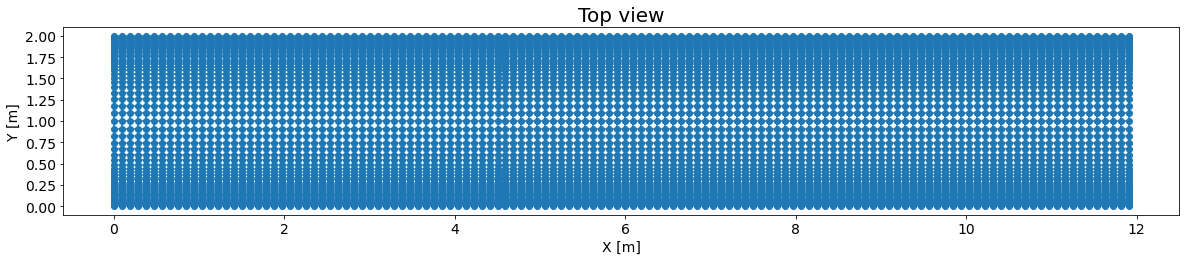

In [105]:
from matplotlib.collections import LineCollection

x_grid, y_grid = np.meshgrid(grid['x'], grid['y'])

fig = plt.figure(figsize = (20,10))
plt.scatter(x_grid, y_grid)

segs1 = np.stack((x_grid,y_grid), axis=2)
segs2 = segs1.transpose(1,0,2)
plt.gca().add_collection(LineCollection(segs1))
plt.gca().add_collection(LineCollection(segs2))
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
plt.xlabel('X [m]', fontsize=14)
plt.ylabel('Y [m]', fontsize=14)
plt.title('Top view', fontsize=20)
plt.gca().set_aspect('equal', adjustable='box')

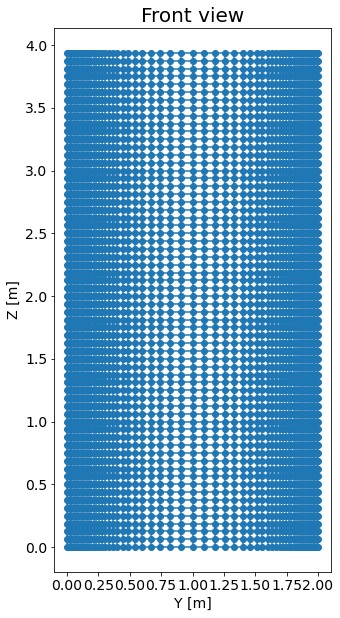

In [106]:
from matplotlib.collections import LineCollection

y_grid, z_grid = np.meshgrid(grid['y'], grid['z'])

fig = plt.figure(figsize = (10,10))
plt.scatter(y_grid, z_grid)

segs1 = np.stack((y_grid,z_grid), axis=2)
segs2 = segs1.transpose(1,0,2)
plt.gca().add_collection(LineCollection(segs1))
plt.gca().add_collection(LineCollection(segs2))
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
plt.xlabel('Y [m]', fontsize=14)
plt.ylabel('Z [m]', fontsize=14)
plt.title('Front view', fontsize=20)
plt.gca().set_aspect('equal', adjustable='box')

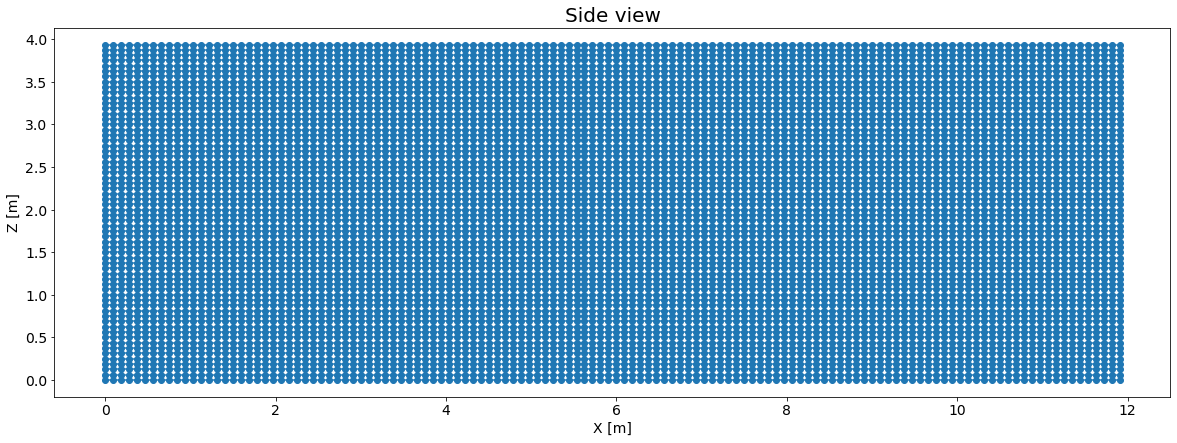

In [107]:
from matplotlib.collections import LineCollection

x_grid, z_grid = np.meshgrid(grid['x'], grid['z'])

fig = plt.figure(figsize = (20,10))
plt.scatter(x_grid, z_grid)

segs1 = np.stack((x_grid,z_grid), axis=2)
segs2 = segs1.transpose(1,0,2)
plt.gca().add_collection(LineCollection(segs1))
plt.gca().add_collection(LineCollection(segs2))
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
plt.xlabel('X [m]', fontsize=14)
plt.ylabel('Z [m]', fontsize=14)
plt.title('Side view', fontsize=20)
plt.gca().set_aspect('equal', adjustable='box')

In [108]:
ds = x3d.init_dataset(prm)
ds

<xarray.Dataset>
Dimensions:  (x: 128, y: 65, z: 64, n: 0)
Coordinates:
  * x        (x) float64 0.0 0.09375 0.1875 0.2812 ... 11.62 11.72 11.81 11.91
  * y        (y) float64 0.0 0.01081 0.02167 0.03262 ... 1.967 1.978 1.989 2.0
  * z        (z) float64 0.0 0.0625 0.125 0.1875 0.25 ... 3.75 3.812 3.875 3.938
  * n        (n) float64 
Data variables:
    ux       (x, y, z) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    uy       (x, y, z) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    uz       (x, y, z) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    vol_frc  (x, y, z) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

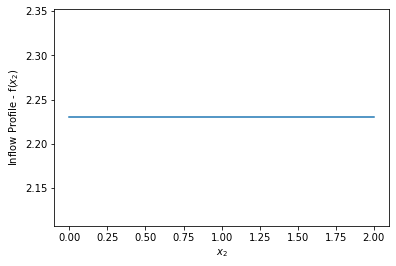

In [109]:
fun = xr.ones_like(ds.y)
fun[:] = 2.23

# This attribute will be shown in the figure
fun.attrs["long_name"] = r"Inflow Profile - f($x_2$)"

fun.plot();

In [110]:
"ux uy uz".split()

['ux', 'uy', 'uz']

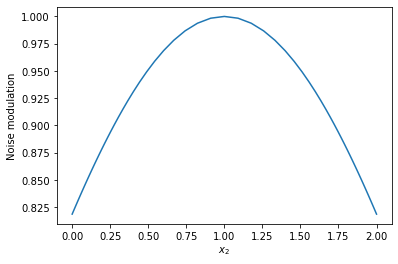

In [111]:
# Random noise with fixed seed,
# important for reproducibility, development and debugging
if prm.iin == 2:
    np.random.seed(seed=67)

mod = np.exp(-0.2 * (ds.y - ds.y[-1] * 0.5) ** 2.0)

# This attribute will be shown in the figure
mod.attrs["long_name"] = "Noise modulation"

mod.plot();

Initial Condition for Streamwise Velocity


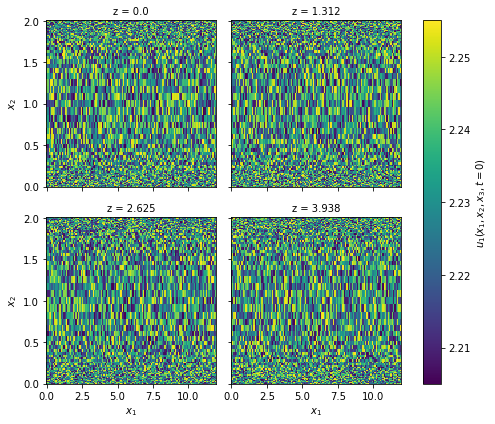

Initial Condition for Vertical Velocity


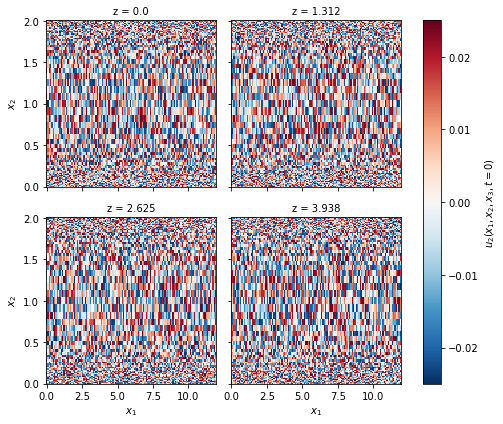

Initial Condition for Spanwise Velocity


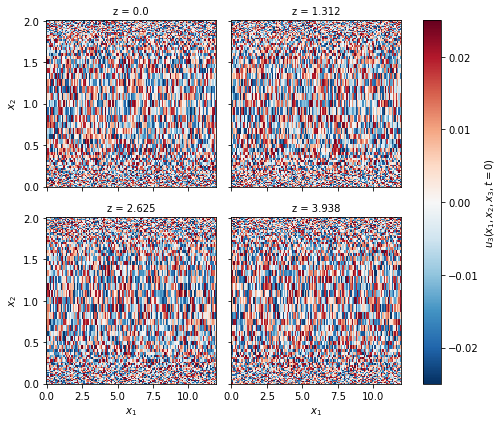

In [112]:
for key in "ux uy uz".split():
    #
    print(ds[key].attrs["name"])
    #
    ds[key] *= 0.0
    ds[key] += prm.init_noise * ((np.random.random(ds[key].shape) - 0.5))
    #ds[key] *= mod
    #
    if key == "ux":
        ds[key] += fun
    #
    ds[key].sel(z=slice(None, None, ds.z.size // 3)).plot(
        x="x", y="y", col="z", col_wrap=2
    )
    plt.show()
    #

plt.close("all")

In [113]:
ds

<xarray.Dataset>
Dimensions:  (x: 128, y: 65, z: 64, n: 0)
Coordinates:
  * x        (x) float64 0.0 0.09375 0.1875 0.2812 ... 11.62 11.72 11.81 11.91
  * y        (y) float64 0.0 0.01081 0.02167 0.03262 ... 1.967 1.978 1.989 2.0
  * z        (z) float64 0.0 0.0625 0.125 0.1875 0.25 ... 3.75 3.812 3.875 3.938
  * n        (n) float64 
Data variables:
    ux       (x, y, z) float64 2.215 2.246 2.242 2.24 ... 2.248 2.244 2.246
    uy       (x, y, z) float64 0.01258 -0.01519 0.008589 ... -0.01513 0.02019
    uz       (x, y, z) float64 0.01772 -0.01532 -0.02485 ... 0.005199 0.01052
    vol_frc  (x, y, z) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

In [114]:
prm.dataset.write(ds)

In [116]:
prm.write()

In [117]:
prm

Parameters(
    beta = 0.25,
    dt = 0.0025,
    ifirst = 1,
    iin = 1,
    ilast = 100000,
    ilesmod = 1,
    inflow_noise = 0.05,
    init_noise = 0.05,
    istret = 2,
    itype = 3,
    jles = 2,
    nclx1 = 0,
    nclxS1 = 0,
    nclxSn = 0,
    nclxn = 0,
    nclz1 = 0,
    nclzS1 = 0,
    nclzSn = 0,
    nclzn = 0,
    nx = 128,
    ny = 65,
    nz = 64,
    re = 284438.7755102041,
    smagcst = 0.14,
    u1 = 2.23,
    u2 = 2.23,
    walecst = 0.325,
    xlx = 12.0,
    yly = 2.0,
    zlz = 4.0,
)